# The Time Series Analysis of air passengers seasonality

### The Dataframe represents the number of passengers using the plane each month between 1949 and 1960.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

airpass = pd.read_csv('/Users/ayseljafarova/Desktop/AirPassengers.csv', header=0, parse_dates=[0], index_col=0, squeeze =True) 

airpasslog = np.log(airpass) #Log transform

airpasslog_1 = airpasslog.diff().dropna() #Simple difference

airpasslog_2 = airpasslog_1.diff(periods = 12).dropna() # 12 order difference

##### Dispalying dataframe

In [15]:
airpass.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

##### Data types and index types

In [16]:
print('Data Types:')
print(airpass.dtypes)
print(airpass.index)

Data Types:
int64
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


##### Plotting of logarithmic coverted data according to time

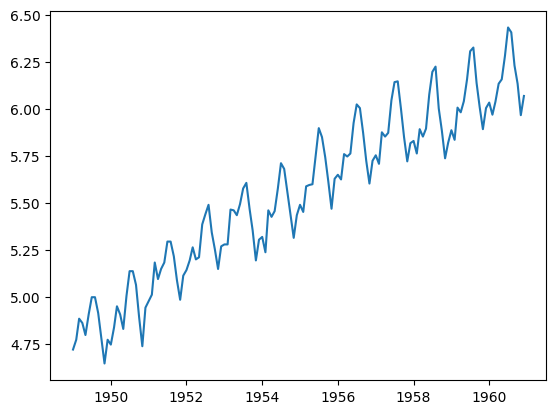

In [5]:
airpasslog = np.log(airpass)
plt.plot(airpasslog);

###### Displaying trend, seasonality and residue of the data using statmodels

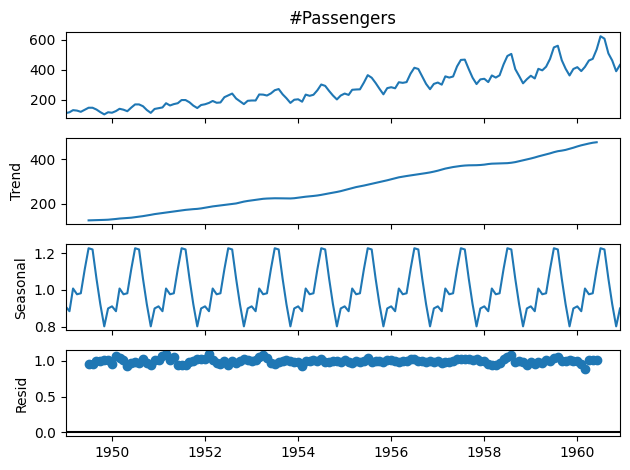

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(airpass, model = 'multiplicative')
res.plot()
plt.show();

##### The seasonally corrected series seasonally and the time series on the same chart.

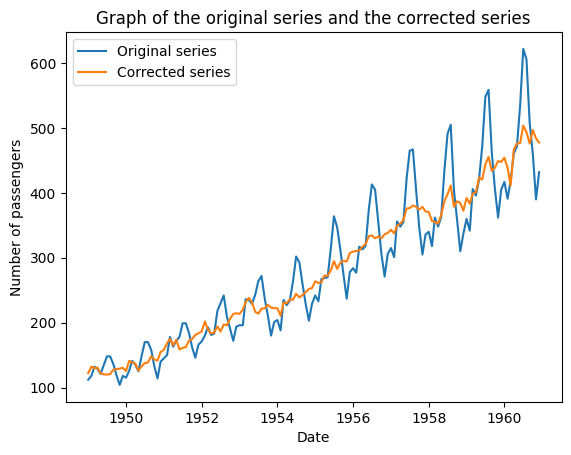

In [8]:
# We apply the seasonal_decompose function to airpasslog

# Here we use the transform in log we are therefore in an additive model

mult = seasonal_decompose(airpasslog)

# Seasonal coefficients are subtracted from the airpasslog series

cvs=airpasslog- mult.seasonal

# We go to the exponential to find the original series

x_cvs=np.exp(cvs)


# We display the series

plt.plot(airpass, label='Original series')

plt.plot(x_cvs, label='Corrected series') 

plt.title('Graph of the original series and the corrected series')

plt.xlabel('Date')

plt.ylabel('Number of passengers')

plt.legend();

##### Plotting moving average

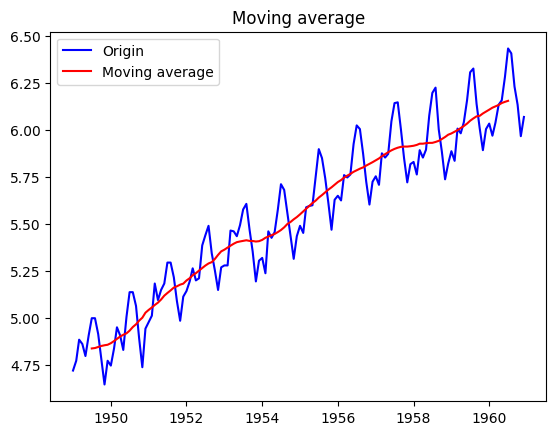

In [10]:
airpass_ma = airpasslog.rolling(window = 12, center = True).mean()
plt.plot(airpasslog, color = 'blue', label = 'Origin')
plt.plot(airpass_ma, color = 'red', label = 'Moving average')
plt.legend()
plt.title('Moving average')
plt.show();

##### Plotting moving average on exponential series

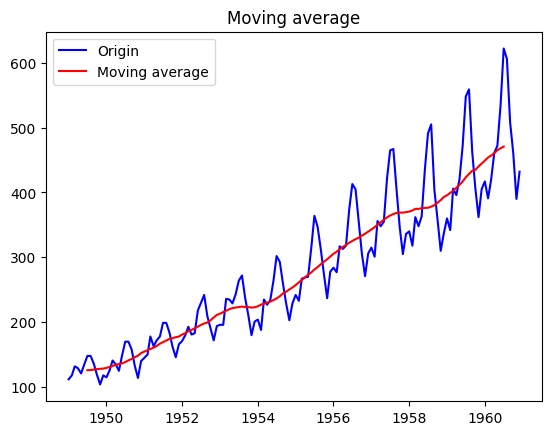

In [21]:
plt.plot(np.exp(airpasslog), color = 'blue', label = 'Origin')

plt.plot(np.exp(airpass_ma), color = 'red', label = 'Moving average')

plt.legend()

plt.title('Moving average')

plt.show()


In [22]:
airpasslog_without_ma = airpasslog - airpass_ma

# Display of the first 10 values

airpasslog_without_ma.head(10)


Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.161034
1949-08-01    0.158831
1949-09-01    0.068807
1949-10-01   -0.070221
Name: #Passengers, dtype: float64

In [23]:
airpasslog_without_ma = airpasslog_without_ma.dropna()
airpasslog_without_ma.head(10)

Month
1949-07-01    0.161034
1949-08-01    0.158831
1949-09-01    0.068807
1949-10-01   -0.070221
1949-11-01   -0.208742
1949-12-01   -0.085158
1950-01-01   -0.119133
1950-02-01   -0.039333
1950-03-01    0.061597
1950-04-01    0.005616
Name: #Passengers, dtype: float64

In [24]:
df = airpasslog_without_ma.to_frame()
df['month'] =(df.index).month
df.head()

,#Passengers,month
Month,,
1949-07-01,0.161034,7
1949-08-01,0.158831,8
1949-09-01,0.068807,9
1949-10-01,-0.070221,10
1949-11-01,-0.208742,11


In [25]:
seasonality = df.groupby('month').mean()
seasonality = seasonality - seasonality.mean()

##### Original series airpass and seasonally adjusted series airpass_csv on the same chart

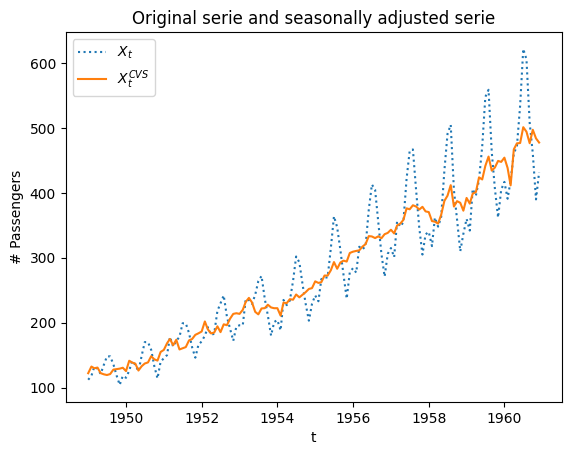

In [27]:
seasonal_vector = np.zeros(144)
    
j=0

for i in range (12):
    seasonal_vector[j:j+12] = seasonality.iloc[:,0]
    j=j+12
airpasslog_cvs = airpasslog - seasonal_vector
airpass_cvs = np.exp(airpasslog_cvs)

plt.plot(airpass, ':', label = '$X_t$')
plt.plot(airpass_cvs, label = '$X_t^{CVS}$')
plt.title('Original serie and seasonally adjusted serie')
plt.xlabel('t')
plt.ylabel('# Passengers')
plt.legend();

##### the autocorrelation function of the time series.

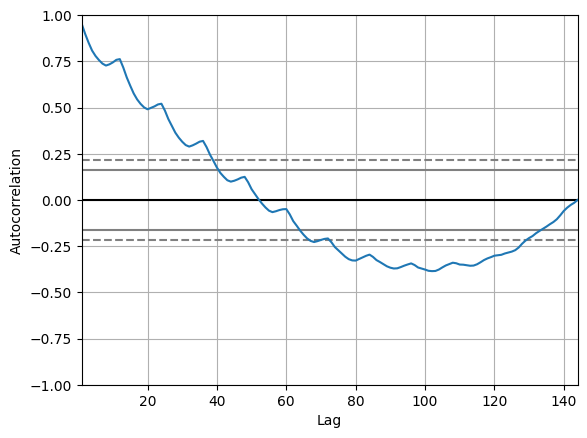

In [10]:
# Insert your code here
pd.plotting.autocorrelation_plot(airpasslog);

##### Plot of differenced time series and  autocorrelation function of the differenced time series.

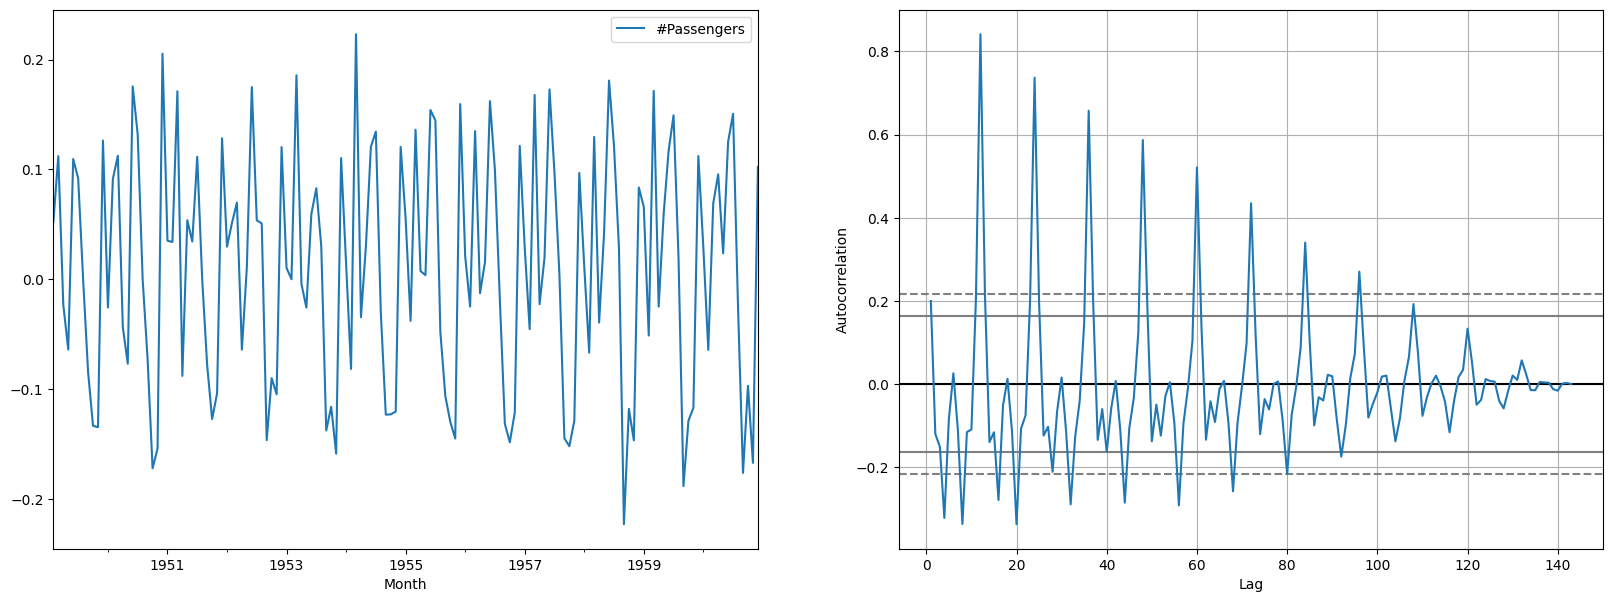

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
airpasslog_1 = airpasslog.diff().dropna()
airpasslog_1.plot(ax = ax1)
pd.plotting.autocorrelation_plot(airpasslog_1, ax = ax2);

##### Augmented Dickey-Fuller test to the differenced series

In [13]:
_,p_value,_,_,_,_=sm.tsa.stattools.adfuller(airpasslog_2)
p_value

0.00024859123113839764

##### Autocorrelograms of the doubly differenced time series

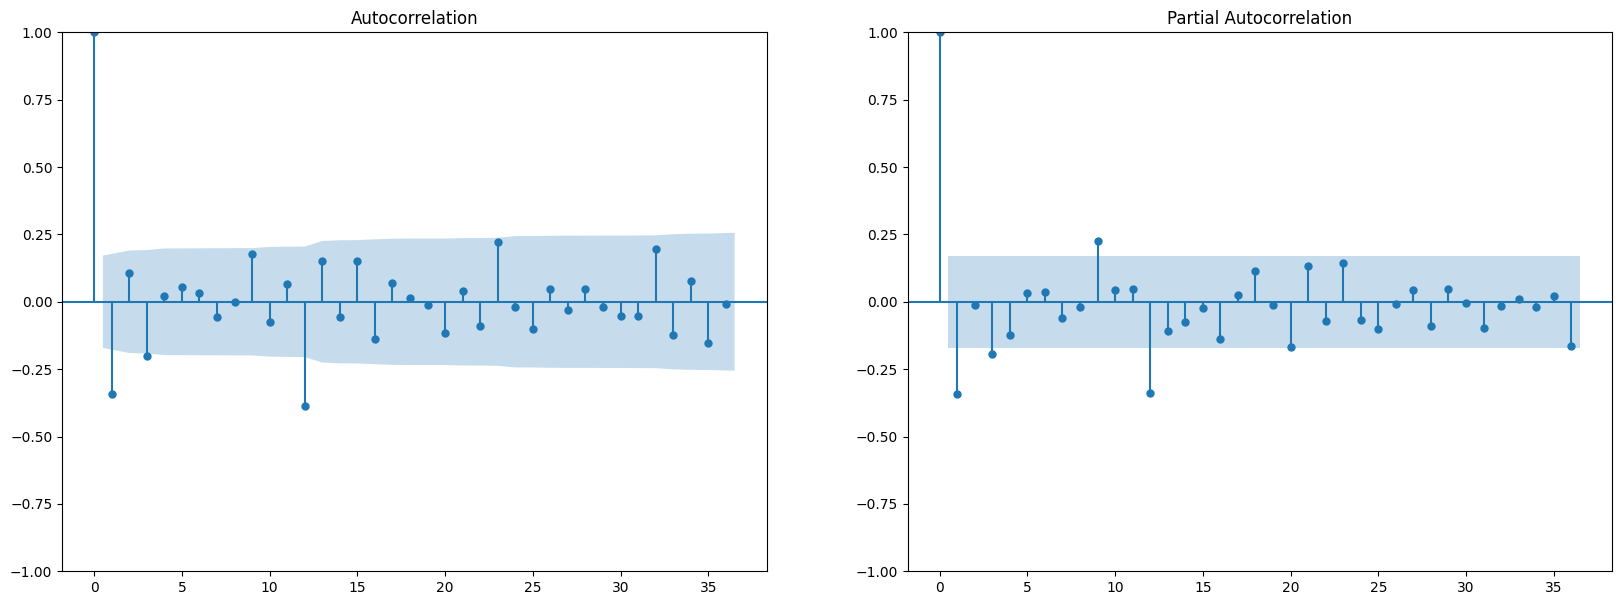

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,7))
plot_acf(airpasslog_2, lags =36, ax=ax1)
plot_pacf(airpasslog_2, lags =36, ax=ax2)
plt.show();

#### SARIMAX Model 

In [10]:
model = sm.tsa.SARIMAX(airpasslog,order=(0,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()
print(sarima.summary())

/Users/ayseljafarova/anaconda3/envs/newenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ayseljafarova/anaconda3/envs/newenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66903D+00    |proj g|=  5.46246D+00

At iterate    5    f= -1.68809D+00    |proj g|=  1.70203D-01

At iterate   10    f= -1.69341D+00    |proj g|=  2.84350D+00

At iterate   15    f= -1.69920D+00    |proj g|=  7.09689D-03

At iterate   20    f= -1.69928D+00    |proj g|=  1.46478D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     33      1     0     0   4.022D-03  -1.699D+00
  F =  -1.6992810938635976     

CONVERG

#### Prediction of the values of the series over the 12 months 

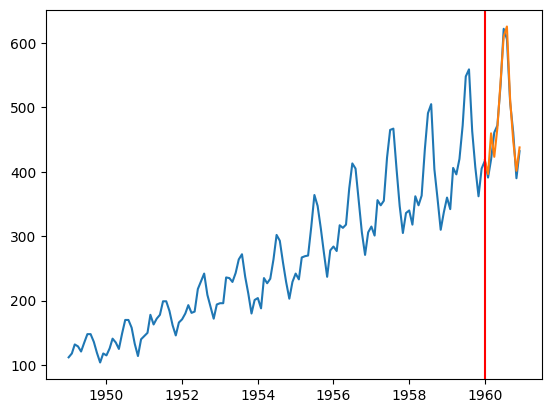

In [5]:
import datetime
pred = np.exp(sarima.predict(132,143))
airpasspred = pd.concat([airpass,pred])
plt.plot(airpasspred)
plt.axvline(x = datetime.date(1960,1,1), color ='red');

#### Forecasting of series over 12 months and the confidence interval on the prediction

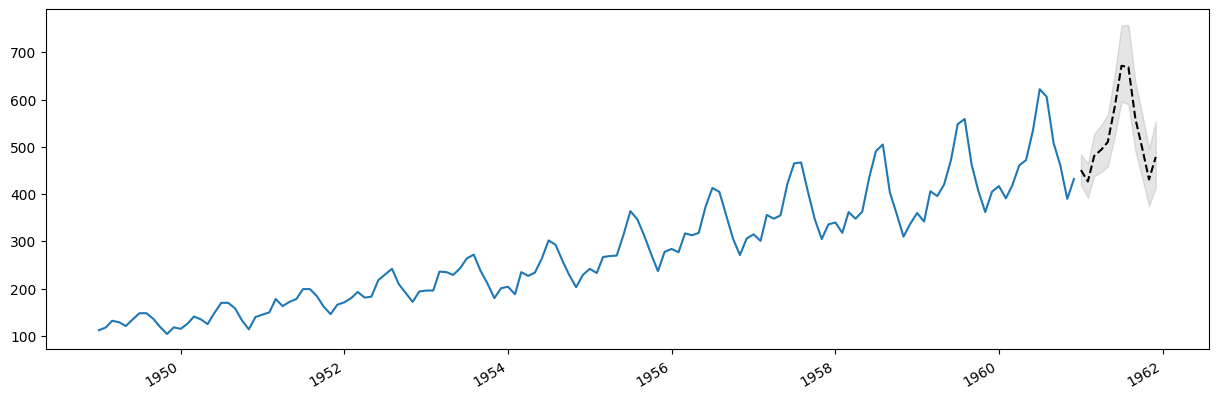

In [6]:
prediction = sarima.get_forecast(steps =12).summary_frame()  #PForecasting with a confidence interval

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(airpass)
prediction = np.exp(prediction) # Exponential Transform

prediction['mean'].plot(ax = ax, style = 'k--') # Plotting the mean

ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color='k', alpha=0.1); #Plotting the confidence interval